#**Hypothyroid Prediction**

**Overview**


> Hypothyroidsm is a condition in which the thyroid gland cannot make enough thyroid hormones. Lack of thyroid hormone in hypothyroidism can alter heart rate, body temperature, and all aspects of metabolism. Hypothyroidism is more common in older women. The main symptoms include fatigue, sensitivity to cold, constipation, dry skin, and unexplained weight gain. Treatment includes thyroid hormone replacement.

> Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.





**Research Question**



>  Use the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid



**Objective**



> Find the best model that can be used to predict if a patient is positve or negative for hypothyroidsm disease.



##The Experimental Design

1. Importing the libraries

2. Loading the data

3. Data Cleaning

4. Exploratory analysis

5. Random Forest Modeling

>        Adaboosting

>       Gradient Boosting

6. Support Vector Machine

7.  Conclusion

#Importing the libraries

In [83]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

#Uploading the dataset

In [84]:
#Uploadint the data
df = pd.read_csv('http://bit.ly/hypothyroid_data')

##Dataset information

In [85]:
#Renaming the columns into a uniform naming convention and removing the white spaces
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [86]:
#preview the top of the  dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [87]:
#preview bottom of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [88]:
#getting column information and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  tsh_meas

In [89]:
#The shape of the data
df.shape

(3163, 26)

#Data cleaning

In [90]:
#Check for null values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

In [91]:
#The shape of the data
df.shape

(3163, 26)

In [92]:
#check for duplicates
df.duplicated().sum()

77

In [93]:
#Drp the duplicates
df.drop_duplicates(inplace=True)

#Confirm the duplicates have been droped
df.duplicated().sum()

0

In [94]:
#check the data types
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
tsh_measured                 object
tsh                          object
t3_measured                  object
t3                           object
tt4_measured                 object
tt4                          object
t4u_measured                 object
t4u                          object
fti_measured                 object
fti                          object
tbg_measured                 object
tbg                          object
dtype: object

In [95]:
colm = ['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured',
       't4u_measured','fti_measured', 'tbg_measured']
coln = ['age', 'tsh','t3','tt4','t4u','fti','tbg']
for col in colm:
    df[col] = df[col].astype('category')


age, tsh,t3,tt4.t4u,fti,and tbg are measurements that should be in type integer.

We will therefore convert these columns to intergers data type

##Feature Engineering

In [96]:
#first we chek the unique values in these columns
col = ['sex','age', 'tsh','t3','tt4','t4u','fti','tbg']
for i in col:
  print(f'Unique: {i}')
  print(df[i].unique())
  print(' ')
  print('****'*20)

Unique: sex
['M', 'F', '?']
Categories (3, object): ['M', 'F', '?']
 
********************************************************************************
Unique: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
 
********************************************************************************
Unique: tsh
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '

In [97]:
#we investigate the recurring value entry "?" that was in the columns
df_i = df[df['tbg']=='?']
df_i2 = df[df['fti']=='?']
df_i3= df[df['t4u']=='?']
df_i4 = df[df['tt4']=='?']
df_i5 = df[df['t3']=='?']
df_i3.head()

# "?" was recorded when the mearsurement was not done.

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
166,negative,60,M,t,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,0
190,negative,54,M,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,19
206,negative,45,F,f,f,f,f,f,t,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,30
232,negative,15,M,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,48
242,negative,38,F,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,39


In [98]:
#To deal with this, we are going to create a new data frame where ? is assumed to be 0
cols = ['tsh','t3','tt4','t4u','fti','tbg']
df[cols] = df[cols].replace(to_replace =[ "?"], value =0)

In [99]:
#We check if the ? value has been updated
cols = ['tsh','t3','tt4','t4u','fti','tbg']
for i in cols:
  print(f'Unique: {i}')
  print(df[i].unique())
  print(' ')
  print('****'*20)

Unique: tsh
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' 0 '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17' '235'
 '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50' '14'
 '60' '140' '33' '8.70' '0.25' '10.70' '82' '45' '42' '41' '160' '16' '89'
 '44' '176' '6.40' '183' '29' '37' '39' '7.90' '59' '68' '38' '47' '143'
 '6.60' '288' '96' '0.50' '1.20' '1.90' '0.09' '3.10' '0.40' '0.85' '0.30'
 '0.90' '1.50' '4.60' '0.20' '5.80' '4' '1.40' '2' '2.60' '2.90' '0.80'
 '4.90' '10.30' '2.30' '0.70' '0.60' '1.30' '2.50' '5.10' '1.70' '2.70'
 '22' '8.10' '3.30' '5' '3.20' '1.80' '1.10' '0.46' '1' '5.60' '4.40'
 '16.50' '2.10' '6.30' '5.50' '7.40' '5.90' '0.15' '14.90' '2.20' '9.70'
 '9.60' '1.60' '3.70' '3' '2.80' '0.10' '4.20' '27' '3.50' '0.05' '19.20'
 '8' '9.10' '3.60' '7.80' '3.80' '8.50' 

In [100]:
#As for age< we shall fill the ? with the median age
df.loc[df['age']=='?','age']=0
df.loc[df['age']==0,'age']=df['age'].median()

In [101]:
#For the ? in sex, we will check the propotions of each gender
df['sex'].value_counts(normalize = True)

F    0.686649
M    0.289695
?    0.023655
Name: sex, dtype: float64

In [102]:
#Since most of the patients were female, the small 2.36% of the patients shall be assumed to be female.
df['sex'] = df['sex'].replace(to_replace =['?'], value ='F')

#we will check the propotions of each gender again
df['sex'].value_counts(normalize = True)

F    0.710305
M    0.289695
Name: sex, dtype: float64

In [103]:
#We can now convert these columns into floats data types
df[['age','tsh', 't3', 'tt4','t4u', 'fti','tbg']] = df[['age','tsh', 't3', 'tt4','t4u', 'fti','tbg']].astype(float)
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
tbg                           float64
dtype: objec

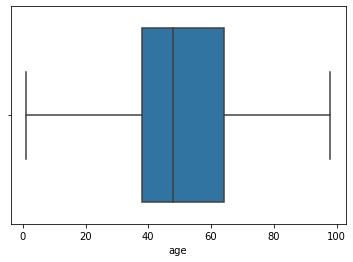

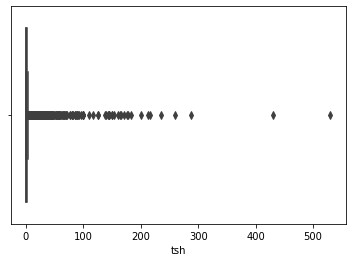

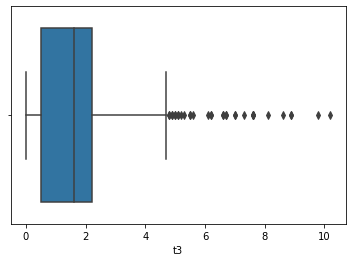

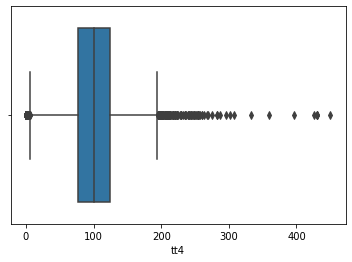

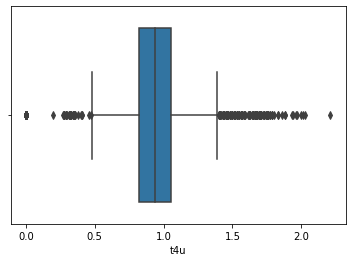

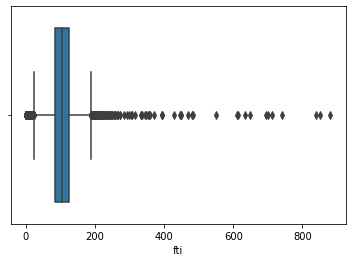

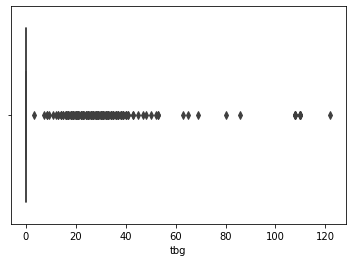

In [104]:
# We can now Check for outliers in the columns with  the numerical data
import matplotlib.pyplot as plt
import seaborn as sns
df1 = df[['age','tsh', 't3', 'tt4','t4u', 'fti','tbg']]
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=df1)
    plt.show()

In [105]:
# Check the number of outliers in the dataset.

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 -Q1
outliers = df[cols][((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape
# outliers are 967 records.
percentage_of_outliers = (len(outliers)/len(df))*100
print(percentage_of_outliers, '% of our data are outliers')

31.335061568373302 % of our data are outliers


Since these are mediacal records, the 31% represent very significant information on the patients and hypothoriod disease identification. For these reseason, we decided not to remove the outliers in the dataset.

In [106]:
#add a new column category next to the age group. we shall group them as follows
#'Toddler/baby, ages 0-2, label 0
#'Child', ages 3 -20, label 1
#'Adult', ages 21 - 64, label adult
#'Elderly' ages 75 and older
category = pd.cut(df.age,bins=[0,2,21,75,120],labels=[0,1,2,3])
df.insert(1,'age group',category)
df.head()

,status,age group,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,2,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,1,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,2,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,2,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,3,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


In [108]:
#confirm there are no more annomalies in the data
features = ['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured',
       't4u_measured','fti_measured', 'tbg_measured']

for i in features:
  print(f'Unique: {i}')
  print(df[i].unique())
  print(' ')
  print('****'*20)

Unique: status
['hypothyroid', 'negative']
Categories (2, object): ['hypothyroid', 'negative']
 
********************************************************************************
Unique: sex
['M', 'F']
Categories (2, object): ['M', 'F']
 
********************************************************************************
Unique: on_thyroxine
['f', 't']
Categories (2, object): ['f', 't']
 
********************************************************************************
Unique: query_on_thyroxine
['f', 't']
Categories (2, object): ['f', 't']
 
********************************************************************************
Unique: on_antithyroid_medication
['f', 't']
Categories (2, object): ['f', 't']
 
********************************************************************************
Unique: thyroid_surgery
['f', 't']
Categories (2, object): ['f', 't']
 
********************************************************************************
Unique: query_hypothyroid
['f', 't']
Categories (2, object)

In [107]:
#make a copy of the data
dff = df.copy()

In [109]:
#Change the categorical datavto numeric
df = df.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0})

In [110]:
#Confirm the lable encoding values
for i in features:
  print(f'Unique: {i}')
  print(df[i].unique())
  print(' ')
  print('****'*20)

Unique: status
[1 0]
 
********************************************************************************
Unique: sex
[0 1]
 
********************************************************************************
Unique: on_thyroxine
[0 1]
 
********************************************************************************
Unique: query_on_thyroxine
[0 1]
 
********************************************************************************
Unique: on_antithyroid_medication
[0 1]
 
********************************************************************************
Unique: thyroid_surgery
[0 1]
 
********************************************************************************
Unique: query_hypothyroid
[0 1]
 
********************************************************************************
Unique: query_hyperthyroid
[0 1]
 
********************************************************************************
Unique: pregnant
[0 1]
 
*****************************************************************************

In [111]:
#Check the new data types
df.dtypes

status                          int64
age group                    category
age                           float64
sex                             int64
on_thyroxine                    int64
query_on_thyroxine              int64
on_antithyroid_medication       int64
thyroid_surgery                 int64
query_hypothyroid               int64
query_hyperthyroid              int64
pregnant                        int64
sick                            int64
tumor                           int64
lithium                         int64
goitre                          int64
tsh_measured                    int64
tsh                           float64
t3_measured                     int64
t3                            float64
tt4_measured                    int64
tt4                           float64
t4u_measured                    int64
t4u                           float64
fti_measured                    int64
fti                           float64
tbg_measured                    int64
tbg         

# Exploratory analysis

##Univariate analysis

In [62]:
#Descriptive statistics on the dataset
df.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.00000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,0.045690,50.670771,0.710305,0.144524,0.017822,0.013610,0.033377,0.076150,0.076150,0.019767,0.031432,0.012962,0.000648,0.031108,0.852560,4.952793,0.77965,1.507583,0.922229,100.252722,0.922553,0.901850,0.922878,106.582275,0.081335,2.527090
std,0.208846,17.887452,0.453694,0.351677,0.132327,0.115883,0.179647,0.265282,0.265282,0.139220,0.174511,0.113128,0.025453,0.173638,0.354602,22.276447,0.41455,1.179190,0.267854,51.795700,0.267342,0.339608,0.266829,65.484772,0.273393,10.135203
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.500000,1.000000,77.000000,1.000000,0.820000,1.000000,85.000000,0.000000,0.000000
50%,0.000000,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.00000,1.600000,1.000000,100.000000,1.000000,0.940000,1.000000,105.000000,0.000000,0.000000
75%,0.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700000,1.00000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000,0.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.00000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000,122.000000


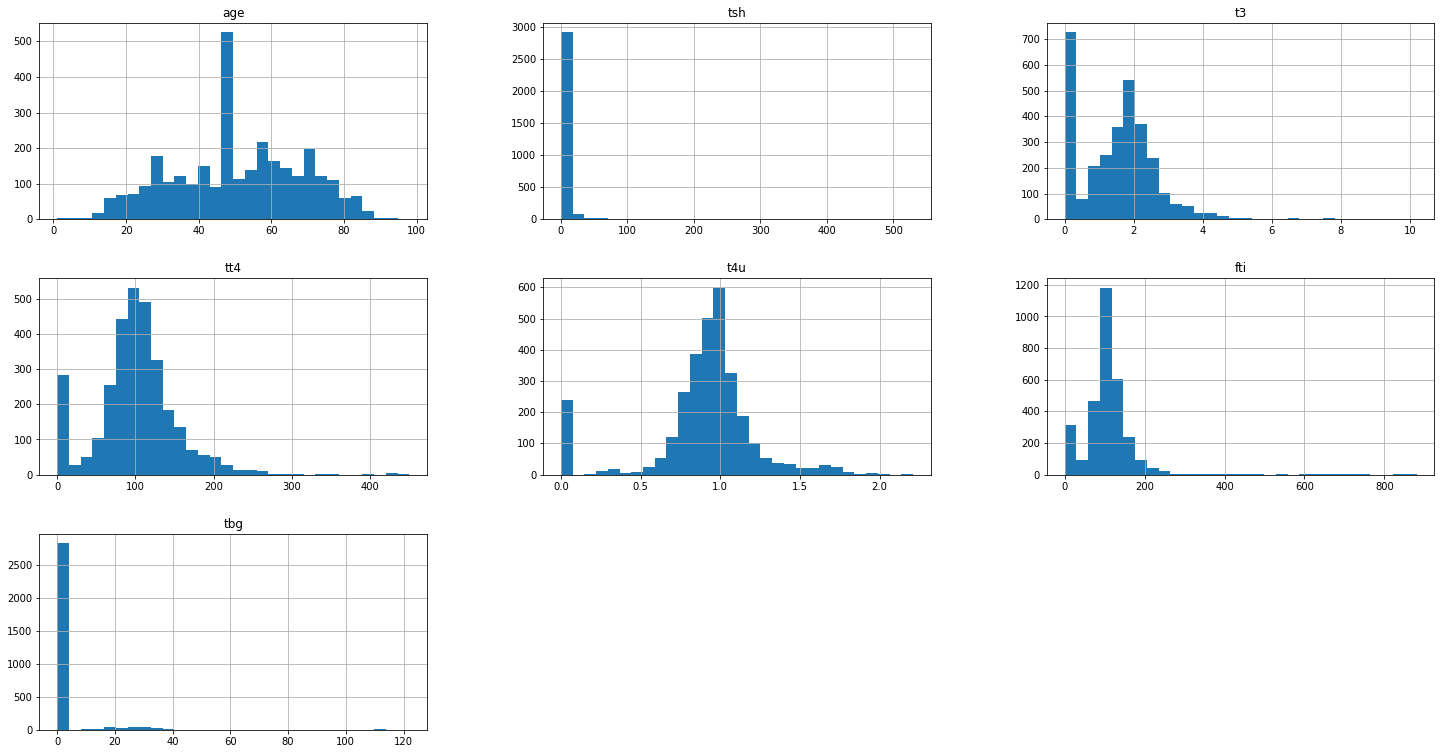

In [63]:
#Histogram of  numeric data distributon
df1 = df[['age','tsh', 't3', 'tt4','t4u', 'fti','tbg']]
df1.hist(bins=30, figsize=(25, 13));

In [64]:
#Skewness and kurtosis of numerical data
colmn = ['age','tsh', 't3', 'tt4','t4u', 'fti','tbg']
for i in colmn:
  print(i)
  print("The skewness is:", df[i].skew())
  print("The kurtosis is:", df[i].kurt())
  s= abs(df[i].skew())
  if s > 1:
    print('highly skewed distribution')
  else:
    print('')
  k = df[i].kurt()
  if k >3:
    print('the distribution is heavy-tailed(leptokutic)')
  elif k < 3:
    print('Distribution is light tailed')
  print("******"*10)

age
The skewness is: -0.10886009850535178
The kurtosis is: -0.6532929094701605

Distribution is light tailed
************************************************************
tsh
The skewness is: 11.115661996068875
The kurtosis is: 179.28817042658284
highly skewed distribution
the distribution is heavy-tailed(leptokutic)
************************************************************
t3
The skewness is: 1.1273329291390457
The kurtosis is: 4.600644022144946
highly skewed distribution
the distribution is heavy-tailed(leptokutic)
************************************************************
tt4
The skewness is: 0.6392402012282863
The kurtosis is: 3.76395648227627

the distribution is heavy-tailed(leptokutic)
************************************************************
t4u
The skewness is: -0.9104506231742094
The kurtosis is: 2.37171958511796

Distribution is light tailed
************************************************************
fti
The skewness is: 3.7143206981869996
The kurtosis is: 33.4813839

Text(0.5, 1.0, 'patients gender)')

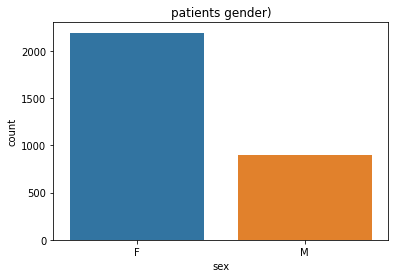

In [66]:
#Male vs female patients
sns.countplot(x='sex', data=dff)
plt.title('patients gender)')

Most of the patients were female

Text(0.5, 1.0, 'Status')

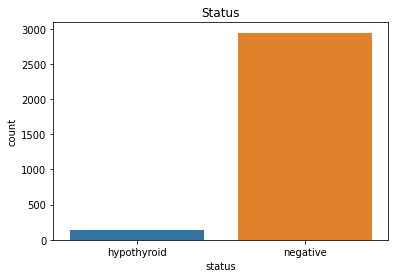

In [67]:
#Staus of  patients
sns.countplot(x='status', data=dff)
plt.title('Status')

Most of the patients tested negative for hypothyroid

Text(0.5, 1.0, 'Was tt4 was measured')

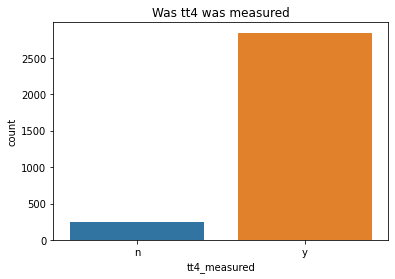

In [68]:
#Patient tested for tt4
sns.countplot(x='tt4_measured', data=dff)
plt.title('Was tt4 was measured')

Most of the patient took the tt4 test

Text(0.5, 1.0, 'Patients on thyroxine')

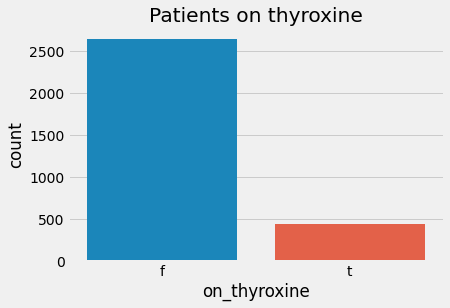

In [154]:
#Plot of Patients on thyroxine
sns.countplot(x='on_thyroxine', data=dff)
plt.title('Patients on thyroxine')

Very few patients were on thyroxine medication

Text(0.5, 1.0, 'Patient with tumor')

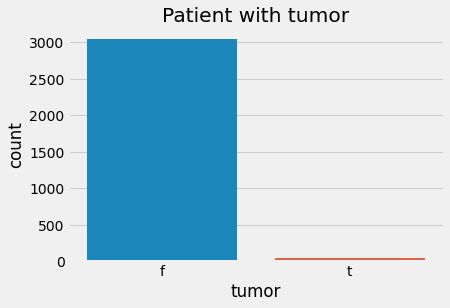

In [156]:
#Patient with tumor
sns.countplot(x='tumor', data=dff)
plt.title('Patient with tumor')

Very few patients had a tumor

Text(0.5, 1.0, 'goitre')

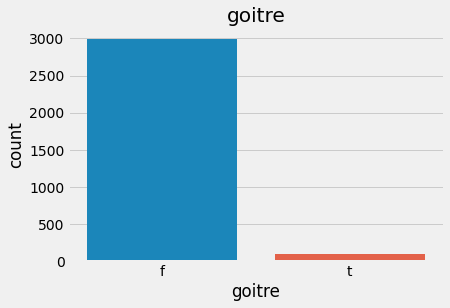

In [157]:
#Patient with
sns.countplot(x='goitre', data=dff)
plt.title('goitre')

Very few patience had goitre

Text(0.5, 1.0, 'Patient age group')

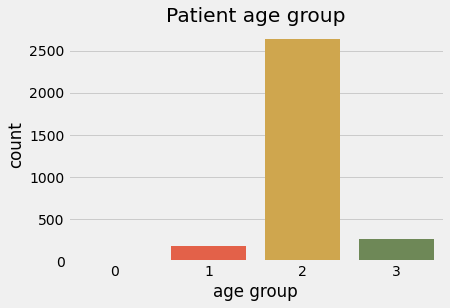

In [159]:
#Patient age group
sns.countplot(x='age group', data=dff)
plt.title('Patient age group')

As explained earlier, age group 2 includes patients between the ages 21 to 75, this was the most affected age group.

Children below the ages of 2 were not affected.

Text(0.5, 1.0, 'Pregnant')

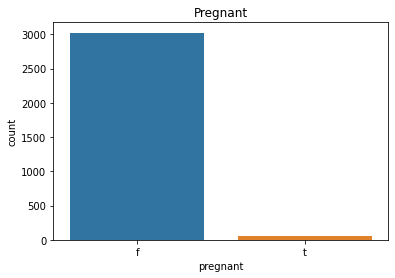

In [71]:
#Patient tested for tt4
sns.countplot(x='pregnant', data=dff)
plt.title('Pregnant')

Very few patients were pregnant.

Text(0.5, 1.0, 'thyroid_surgery')

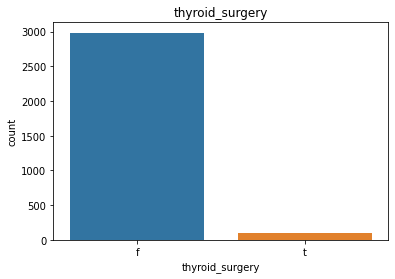

In [70]:
#Patient tested for tt4
sns.countplot(x='thyroid_surgery', data=dff)
plt.title('thyroid_surgery')

Vey few patients had thyroid surgery

Text(0.5, 1.0, 'Patients ages')

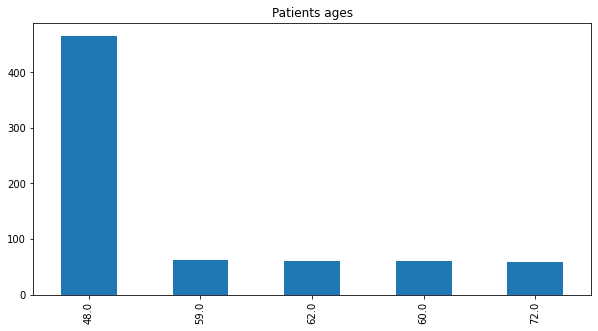

In [77]:
# Bar graph patients ages

df.age.value_counts().sort_values(ascending = False).nlargest(5).plot.bar(figsize=(10,5))
plt.title('Patients ages')

Most of the patients were aged 48. There is a very big gap between the most popular age age and the second most popular age.

##Bivariate analysis

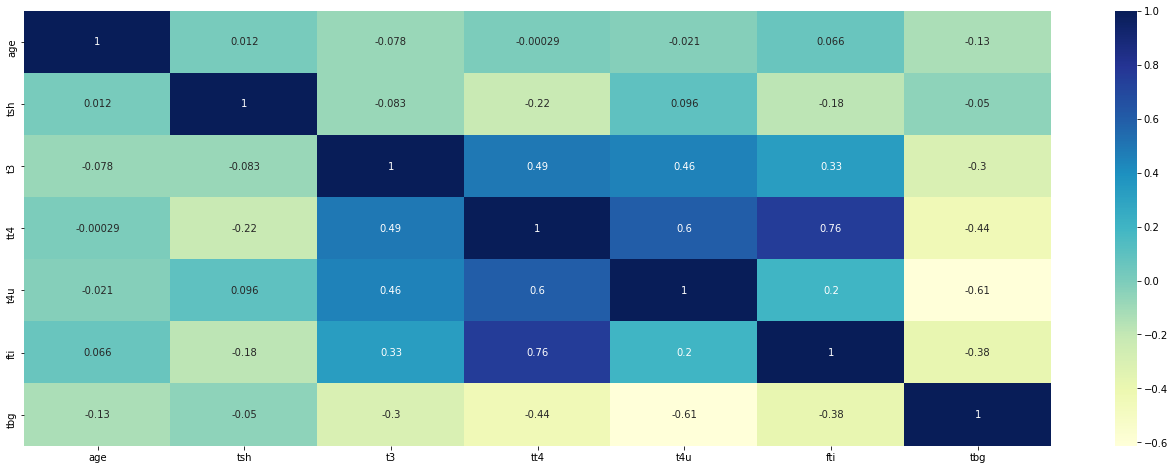

In [76]:
#hearmap to see the correlation between the variables
import seaborn as sns

corr=df1.corr()
plt.figure(figsize=(23,8))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

tbg has a negative correlation with all the other numeric features. Age had weak correlation with the other features indicating that age may not be a majoy contributor to patient results.

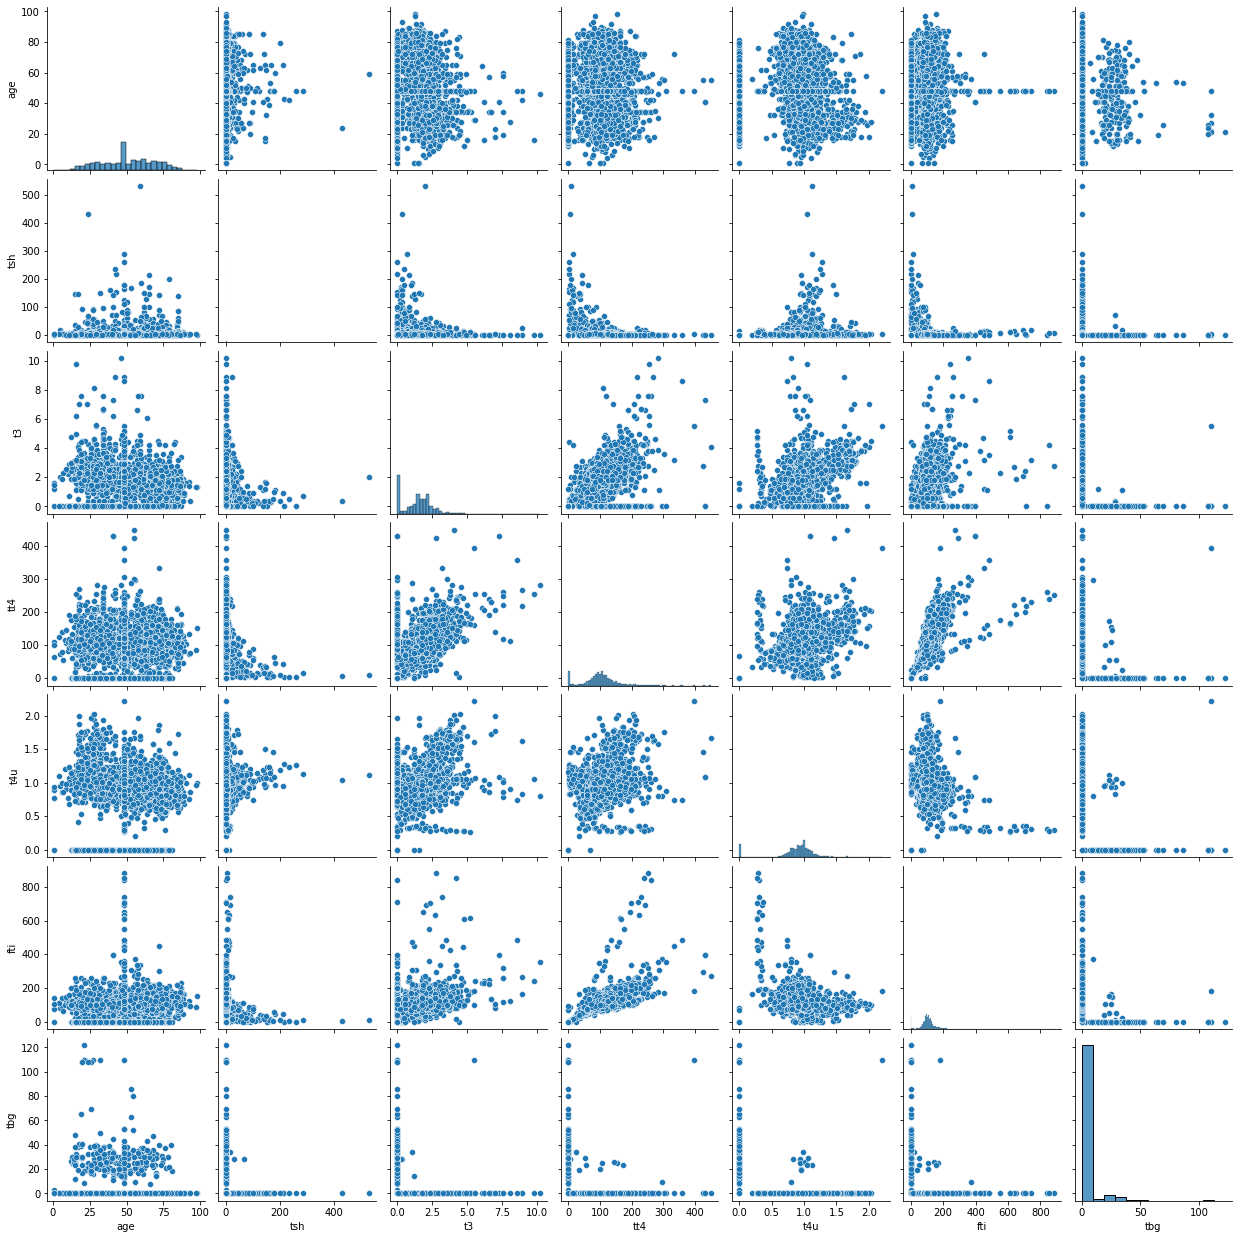

In [80]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df1)
plt.show();

#Modeling

##Random forest

For this model we will use the binary data that has been label encoded

In [112]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data['status'].values


feature = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 't3_measured', 'tt4_measured',
       't4u_measured','fti_measured', 'tbg_measured']

test_features = df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data[feature].values
X = df.drop(['status'], axis =1)
y = df.status

# Train using 70% of the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
 
#Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [113]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
base_pred = forest.predict(X_test)
train_pred = forest.predict(X_train)


In [114]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, base_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, base_pred))

base_acc = accuracy_score(y_test, base_pred)
print('\nModel Accuracy')
print('Accuracy score of test data :  ', accuracy_score(y_test, base_pred))
print('Accuracy score of train data  :  ', accuracy_score(y_train, train_pred))
print('The difference in accuracy    :  ',  (accuracy_score(y_test, base_pred))-(accuracy_score(y_train, train_pred)))
print('\nConfusion matrix')
print(confusion_matrix(y_test, base_pred))

Mean Absolute Error: 0.008639308855291577
Mean Squared Error: 0.008639308855291577

Model Accuracy
Accuracy score of test data :   0.9913606911447084
Accuracy score of train data  :   1.0
The difference in accuracy    :   -0.008639308855291628

Confusion matrix
[[885   2]
 [  6  33]]


In [115]:
# Look at parameters used by our current forest
from pprint import pprint
print('Parameters currently in use:\n')
pprint(forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


the most important paarameters in rrandom forest are n_estimators, max_features, max_depth, min_samples_split , min_samples_leaf, and bootstrap.

We are going to tweak these parameters to see if we can improve our model.

In [118]:
#training the model on expanded parameters

rf = RandomForestClassifier(n_estimators= 500, random_state=42, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
train_pred = rf.predict(X_train)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
 
exp_acc =accuracy_score(y_test, y_pred)

print('\nModel Accuracy')
print('Accuracy score of test data :  ', accuracy_score(y_test, y_pred))
print('Accuracy score of train data  :  ', accuracy_score(y_train, train_pred))
print('The difference in accuracy    :  ',  (accuracy_score(y_test, y_pred))-(accuracy_score(y_train, train_pred)))
print('\nConfusion matrix')
print(confusion_matrix(y_test, y_pred))

#compare performance
if base_acc > exp_acc:
  print('This model best paremeters did not improve model performance')
else:
  g = (exp_acc -base_acc)*100
  print('This model gave us the best parameters that improved model perfomance by :', g, '%')

Mean Absolute Error: 0.008639308855291577
Mean Squared Error: 0.008639308855291577

Model Accuracy
Accuracy score of test data :   0.9913606911447084
Accuracy score of train data  :   0.9898148148148148
The difference in accuracy    :   0.0015458763298935585

Confusion matrix
[[886   1]
 [  7  32]]
This model gave us the best parameters that improved model perfomance by : 0.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


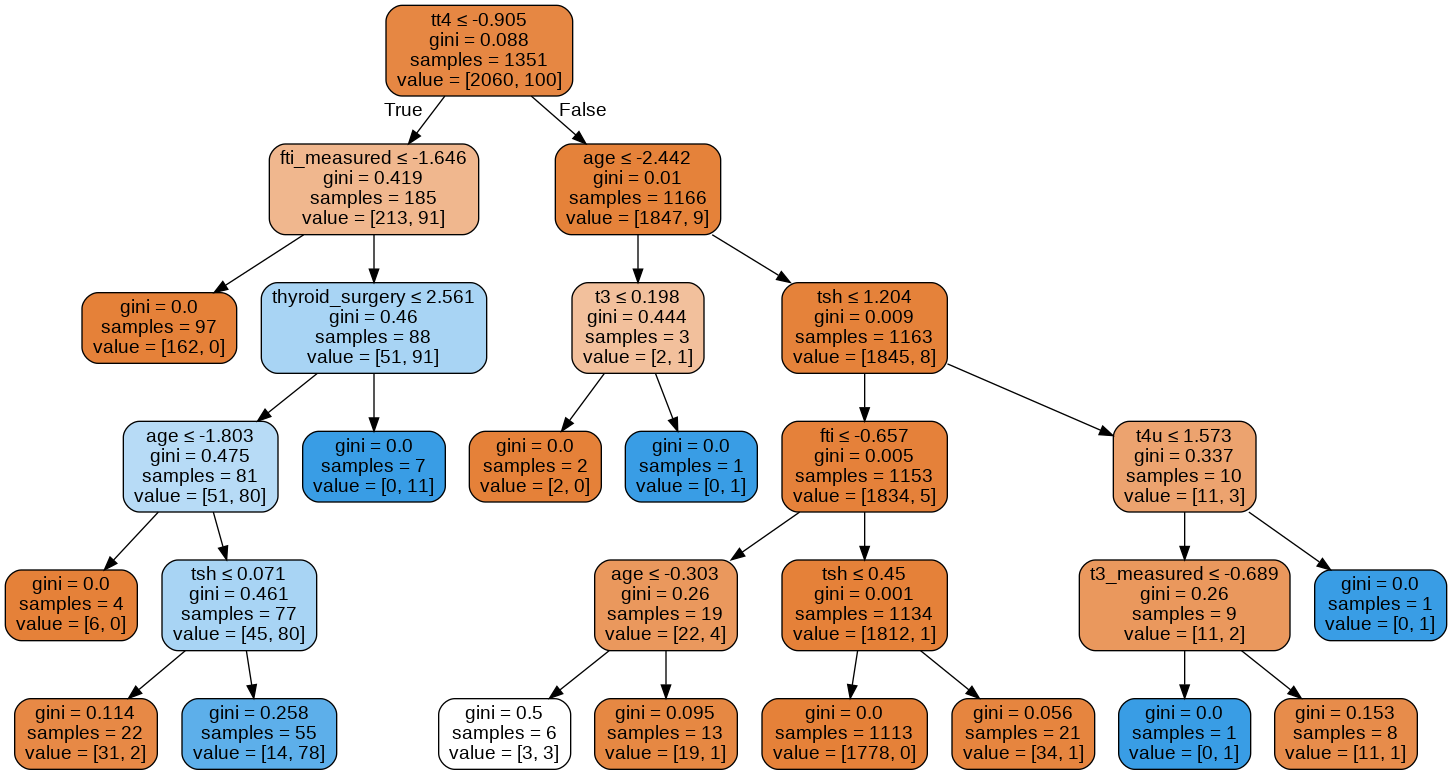

In [119]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = rf.estimators_[80]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

####Feature Importance

In [120]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tsh                  Importance: 0.35
Variable: fti                  Importance: 0.25
Variable: tt4                  Importance: 0.18
Variable: t4u                  Importance: 0.05
Variable: tsh_measured         Importance: 0.03
Variable: t3                   Importance: 0.03
Variable: age                  Importance: 0.02
Variable: t3_measured          Importance: 0.01
Variable: tt4_measured         Importance: 0.01
Variable: t4u_measured         Importance: 0.01
Variable: fti_measured         Importance: 0.01
Variable: tbg_measured         Importance: 0.01
Variable: tbg                  Importance: 0.01
Variable: age group            Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance:

Visualize Feature Importances

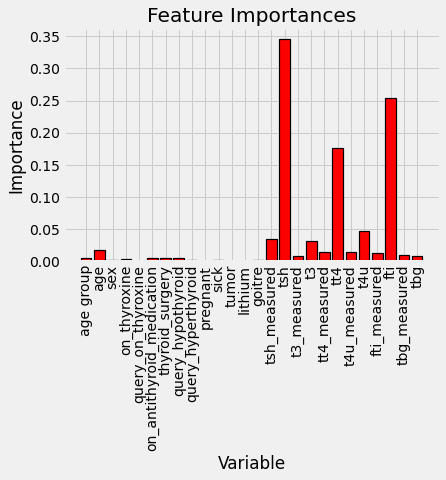

In [121]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances');

In [122]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 11


Creating a model basd on feature importance

In [126]:
#Training the model on the important features only
y = data['status'].values


feature = ['age','tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured']

test_features = df[feature].columns.to_list()


# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[feature].values

# Train using 70% of the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#The model
rf = RandomForestClassifier(n_estimators= 500, random_state=42, max_depth= 5, min_samples_leaf=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
train_pred = rf.predict(X_train)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
 
ftrs_acc =accuracy_score(y_test, y_pred)

print('\nModel Accuracy')
print('Accuracy score of test data :  ', accuracy_score(y_test, y_pred))
print('Accuracy score of train data  :  ', accuracy_score(y_train, train_pred))
print('The difference in accuracy    :  ',  (accuracy_score(y_test, y_pred))-(accuracy_score(y_train, train_pred)))
print('\nConfusion matrix')
print(confusion_matrix(y_test, y_pred))

#compare performance
if exp_acc > ftrs_acc:
  print('This model best paremeters did not improve model performance')
else:
  g = (ftrs_acc -exp_acc)*100
  print('This model gave us the best parameters that improved model perfomance by :', g, '%')

Mean Absolute Error: 0.008639308855291577
Mean Squared Error: 0.008639308855291577

Model Accuracy
Accuracy score of test data :   0.9913606911447084
Accuracy score of train data  :   0.987037037037037
The difference in accuracy    :   0.004323654107671326

Confusion matrix
[[886   1]
 [  7  32]]
This model gave us the best parameters that improved model perfomance by : 0.0 %


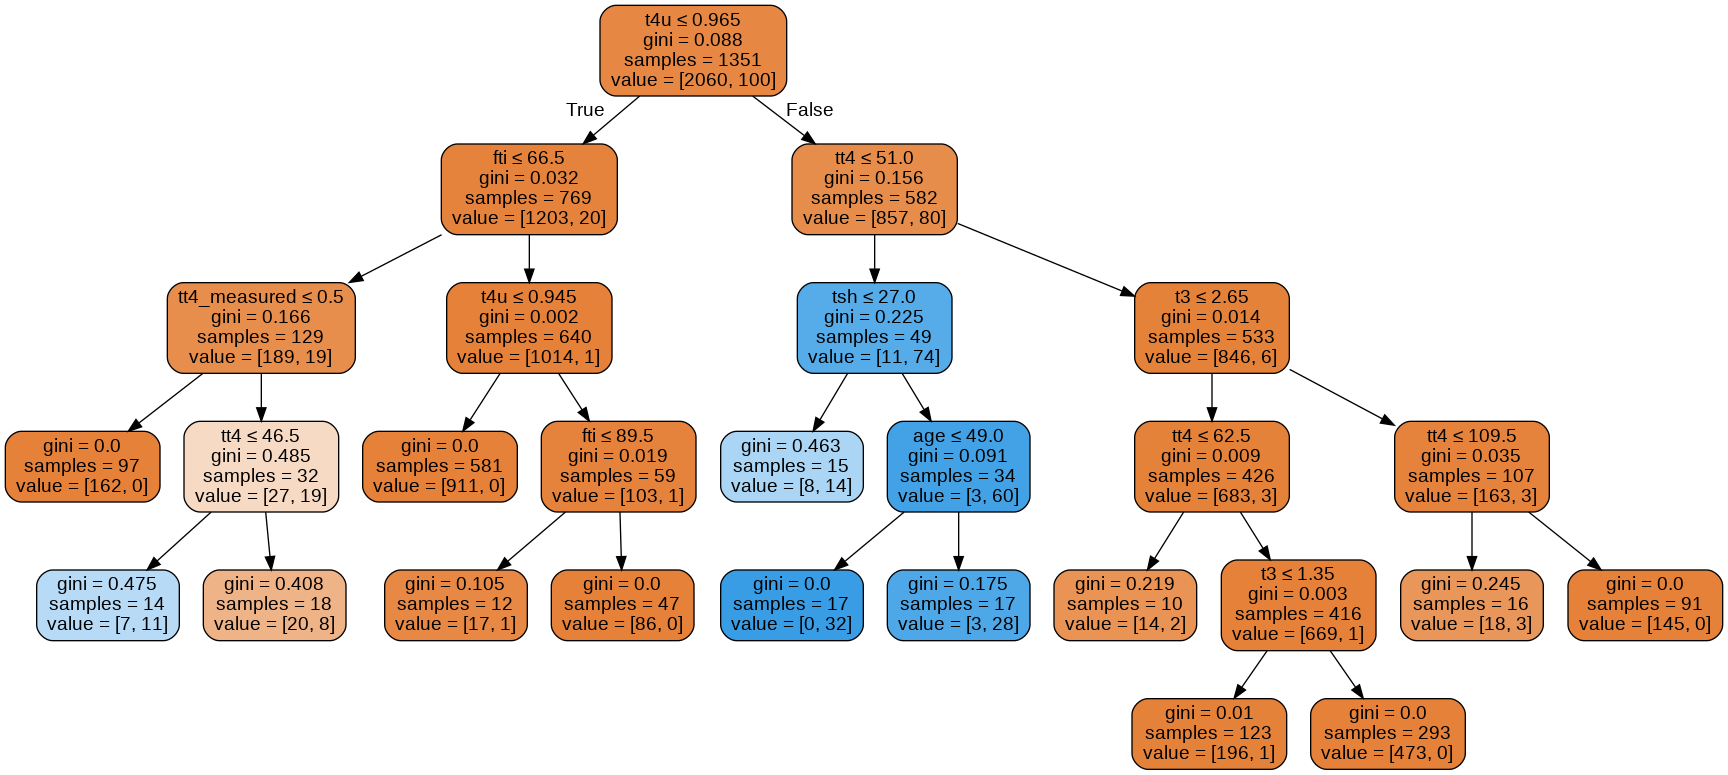

In [127]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = rf.estimators_[80]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

Tuning the model parameters using grid search to get the best parameters

In [128]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [ 8, 16, 32],
    'min_samples_leaf': [3, 8, 10],
    'min_samples_split': [8, 10, 15],
    'n_estimators': [100, 200, 300,500]}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  4.1min finished


{'bootstrap': False,
 'max_depth': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [129]:
#Model prediction
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
train_pred = best_grid.predict(X_train)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
 
print('\nModel Accuracy')
print('Accuracy score of test data :  ', accuracy_score(y_test, y_pred))
print('Accuracy score of train data  :  ', accuracy_score(y_train, train_pred))
print('The difference in accuracy    :  ',  (accuracy_score(y_test, y_pred))-(accuracy_score(y_train, train_pred)))

grd_acc =accuracy_score(y_test, y_pred)

#compare performance
if ftrs_acc > grd_acc:
  print('This model best paremeters did not improve model performance')
else:
  g = (grd_acc - ftrs_acc)*100
  print('This model gave us the best parameters that improved model perfomance by :', g, '%')

Mean Absolute Error: 0.0032397408207343412
Mean Squared Error: 0.0032397408207343412

Model Accuracy
Accuracy score of test data :   0.9967602591792657
Accuracy score of train data  :   0.9930555555555556
The difference in accuracy    :   0.003704703623710115
This model gave us the best parameters that improved model perfomance by : 0.5399568034557323 %


Of all the random forest models, grid search gave the best accuarcy but the expense of a very long computational time.

##Adaboost

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Initiating the adaboost.
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=100, random_state=4)

#fiting the adaboost parmetr to the model
ada_boost = ada_boost.fit(X_train, y_train)

#Making preditions
y_pred_ada = ada_boost.predict(X_test)
train_pred = ada_boost.predict(X_train)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada)) 
 
print('\nModel Accuracy')
print('Accuracy score of test data :  ', accuracy_score(y_test, y_pred_ada))
print('Accuracy score of train data  :  ', accuracy_score(y_train, train_pred))
print('The difference in accuracy    :  ',  (accuracy_score(y_test, y_pred_ada))-(accuracy_score(y_train, train_pred)))

ada_acc =accuracy_score(y_test, y_pred_ada)

#compare performance
if grd_acc > ada_acc:
  print('This model best paremeters did not improve model performance from the previous model')
else:
  g = (ada_acc - grd_acc)*100
  print('This model gave us the best parameters that improved model perfomance by :', g, '%')

Mean Absolute Error: 0.0064794816414686825
Mean Squared Error: 0.0064794816414686825

Model Accuracy
Accuracy score of test data :   0.9967602591792657
Accuracy score of train data  :   1.0
The difference in accuracy    :   -0.003239740820734305
This model best paremeters did not improve model performance


In [131]:
#Looking at the parameters that were used in the adaboost(base model)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(ada_boost.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_esti

In [132]:
# Create the parameter grid search 
from sklearn.model_selection import RandomizedSearchCV

parameters = {'base_estimator__max_depth':[i for i in range(2,11,1)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50, 100, 250,500, 1000],
              'learning_rate':[0.001, 0.01,0.1,1],
              'base_estimator__max_features' : ['auto', 'sqrt']}
random = RandomizedSearchCV(estimator = ada_boost, param_distributions = parameters, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the grid search to the data
random.fit(X_train, y_train)
random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


{'base_estimator__max_depth': 10,
 'base_estimator__max_features': 'sqrt',
 'base_estimator__min_samples_leaf': 5,
 'learning_rate': 0.001,
 'n_estimators': 100}

In [133]:
#Model prediction
y_pred_ada = random.predict(X_test)
train_pred = random.predict(X_train)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada)) 
 
print('\nModel Accuracy')
print('Accuracy score of test data :  ', accuracy_score(y_test, y_pred))
print('Accuracy score of train data  :  ', accuracy_score(y_train, train_pred))
print('The difference in accuracy    :  ',  (accuracy_score(y_test, y_pred))-(accuracy_score(y_train, train_pred)))

ran_acc =accuracy_score(y_test, y_pred_ada)

#compare performance
if grd_acc > ran_acc:
  print('This model best paremeters did not improve model performance')
else:
  g = (ran_acc - grd_acc)*100
  print('This model gave us the best parameters that improved model perfomance by :', g, '%')

Mean Absolute Error: 0.0032397408207343412
Mean Squared Error: 0.0032397408207343412

Model Accuracy
Accuracy score of test data :   0.9967602591792657
Accuracy score of train data  :   0.9958333333333333
The difference in accuracy    :   0.0009269258459323471
This model gave us the best parameters that improved model perfomance by : 0.0 %


Adaboost did not give a better model from the random forest boos, the improvment in the model was 0.0% percent.

##Gradient boost

In [134]:
#We first create a base gradient boost model that will be used to assess the preformance of the models best parameters obtained throught grid search.
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 100

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.01, max_depth=2)
gbr = gbr.fit(X_train, y_train)


#Model prediction
y_pred_gbr = gbr.predict(X_test)
train_pred = gbr.predict(X_train)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr)) 
 
print('\nModel Accuracy')
print('Accuracy score of test data :  ', accuracy_score(y_test, y_pred_gbr))
print('Accuracy score of train data  :  ', accuracy_score(y_train, train_pred))
print('The difference in accuracy    :  ',  (accuracy_score(y_test, y_pred_gbr))-(accuracy_score(y_train, train_pred)))

gbr_acc =accuracy_score(y_test, y_pred_gbr)

#compare performance
if grd_acc > ran_acc:
  print('This model best paremeters did not improve model performance')
else:
  g = (ran_acc - grd_acc)*100
  print('This model gave us the best parameters that improved model perfomance by :', g, '%')

Mean Absolute Error: 0.009719222462203024
Mean Squared Error: 0.009719222462203024

Model Accuracy
Accuracy score of test data :   0.990280777537797
Accuracy score of train data  :   0.9861111111111112
The difference in accuracy    :   0.004169666426685814
This model gave us the best parameters that improved model perfomance by : 0.0 %


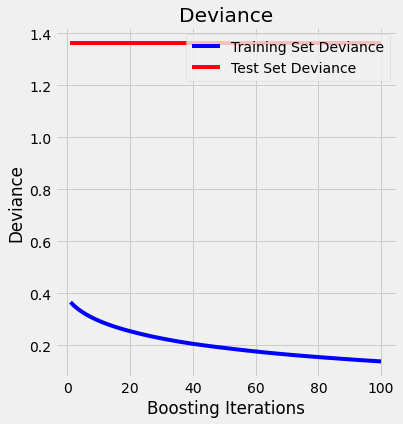

100


In [135]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(target_number_of_trees) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')

test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gbr.loss_(y_test, y_pred_gbr)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()
print(len(test_score))

Use grid research to find the best params to improve performnce of gradient boost model.

In [139]:
# A grid search to find the best parameters for the gradient boost model.

parameters = {
    "learning_rate": [0.001,0.01, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5,8),
    "min_samples_leaf": np.linspace(0.1, 0.5, 8),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10,100,300]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(estimator=gbr,param_grid=parameters,cv=2, n_jobs=-1)

clf.fit(X_train, y_train)


In [98]:
#Model prediction using the best parameters for the grid search.
y_pred_gbr = clf.predict(X_test)
train_pred = clf.predict(X_train)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr)) 

print('\nModel Accuracy')
print('Accuracy score of test data :  ', accuracy_score(y_test, y_pred))
print('Accuracy score of train data  :  ', accuracy_score(y_train, train_pred))
print('The difference in accuracy    :  ',  (accuracy_score(y_test, y_pred))-(accuracy_score(y_train, train_pred)))

grbb_acc =accuracy_score(y_test, y_pred_gbr)

#compare performance
if ran_acc > grbb_acc:
  print('This model best paremeters did not improve model performance')
else:
  g = (grbb_acc - ran_acc)*100
  print('This model gave us the best parameters that improved model perfomance by :', g, '%')

Mean Absolute Error: 0.08454004913810222
Mean Squared Error: 0.039904807722174425
Root Mean Squared Error: 0.1997618775496827

The R2 score is                :  0.010857257064168069
The Train R2 score is          :  0.006524296032105581


-0.004332961032062488

##Support Vector Modeling

In [140]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

We are doing to find the best SVM model using the 2  most important features identified in the random forest model.

In [141]:
# let us use all the features
X = df[['tsh', 'fti']]
y = df.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [142]:
## Creating the linear kernel
# Fit the model
linear = SVC(kernel= 'linear')
linear.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_linear = linear.predict(X_test)
y_pred_training = linear.predict(X_train)
# Model Evaluation
print('Accuracy of the training  :', accuracy_score(y_train, y_pred_training))
print('Accuracy of the  model  :', accuracy_score(y_test, y_pred_linear))
print('\n Confusion matrix')
print(confusion_matrix(y_test, y_pred_linear))

Accuracy of the training  : 0.9763888888888889
Accuracy of the  model  : 0.9697624190064795

 Confusion matrix
[[884   4]
 [ 24  14]]


In [143]:
# Creating the polynomial kernel
# Fit the model
poly = SVC(kernel= 'poly',degree=3,gamma='auto')
poly.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_poly = poly.predict(X_test)
y_pred_training = poly.predict(X_train)
# Model Evaluation
print('Accuracy of the training  :', accuracy_score(y_train, y_pred_training))
print('Accuracy of the  model  :', accuracy_score(y_test, y_pred_poly))
print('Check for over/under fitting : ', (accuracy_score(y_train, y_pred_training))-(accuracy_score(y_test, y_pred_poly)))
print('\n Confusion matrix')
print(confusion_matrix(y_test, y_pred_poly))

Accuracy of the training  : 0.9805555555555555
Accuracy of the  model  : 0.978401727861771
Check for over/under fitting :  0.0021538276937844714

 Confusion matrix
[[886   2]
 [ 18  20]]


In [144]:
# Building the rbf model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_rbf = rbfclassifier.predict(X_test)
y_pred_training = rbfclassifier.predict(X_train)
# Model Evaluation
print('Accuracy of the training  :', accuracy_score(y_train, y_pred_training))
print('Accuracy of the  model  :', accuracy_score(y_test, y_pred_rbf))
print('Check for over/under fitting : ', (accuracy_score(y_train, y_pred_training))-(accuracy_score(y_test, y_pred_rbf)))
print('\n Confusion matrix')
print(confusion_matrix(y_test, y_pred_rbf))

Accuracy of the training  : 0.9861111111111112
Accuracy of the  model  : 0.9838012958963283
Check for over/under fitting :  0.0023098152147829065

 Confusion matrix
[[885   3]
 [ 12  26]]


Of the three models, rbd had the hifhest accuracy of 98%. W ethen choose these model and used it to create the prediction models with the other features that were classified as the important features in the random forest model.

In [145]:
# Building the rbf model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_rbf = rbfclassifier.predict(X_test)
y_pred_training = rbfclassifier.predict(X_train)
acc_rbf = accuracy_score(y_train, y_pred_training)
# Model Evaluation
print('Accuracy of the training  :', accuracy_score(y_train, y_pred_training))
print('Accuracy of the  model  :', accuracy_score(y_test, y_pred_rbf))
print('Check for over/under fitting : ', (accuracy_score(y_train, y_pred_training))-(accuracy_score(y_test, y_pred_rbf)))
print('\n Confusion matrix')
print(confusion_matrix(y_test, y_pred_rbf))

Accuracy of the training  : 0.9861111111111112
Accuracy of the  model  : 0.9838012958963283
Check for over/under fitting :  0.0023098152147829065

 Confusion matrix
[[885   3]
 [ 12  26]]


Tuning the SVM Radial basis function model

In [146]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(estimator = rbfclassifier, param_grid = param_grid,refit=True,verbose=2, cv = 3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [153]:
# Making predictions for our test dataset
y_pred_grbf = grid.predict(X_test)
y_pred_training = grid.predict(X_train)
grid_acc = accuracy_score(y_test, y_pred_grbf)
# Model Evaluation
print('Accuracy of the training  :', accuracy_score(y_train, y_pred_training))
print('Accuracy of the  model  :', accuracy_score(y_test, y_pred_grbf))
print('Check for over/under fitting : ', (accuracy_score(y_train, y_pred_training))-(accuracy_score(y_test, y_pred_grbf)))
print('\n Confusion matrix')
print(confusion_matrix(y_test, y_pred_grbf))

#Compare models
if acc_rbf > grid_acc:
  print('\nGrid search best paremeters didd not improve model performance')
else:
  g = (grid_acc -acc_rbf)*100
  print('\nThe grid search gave us the best parameters that improved model perfomance by :', g, '%')

Accuracy of the training  : 0.9912037037037037
Accuracy of the  model  : 0.9870410367170627
Check for over/under fitting :  0.004162666986641028

 Confusion matrix
[[882   6]
 [  6  32]]

The grid search gave us the best parameters that improved model perfomance by : 0.09299256059515093 %


**Compare the best gradient boost model and best svm model accuaracy**

In [152]:
#Determining the best model overall.
if ran_acc > grid_acc:
  print('Gradient boost accuracy score : ', ran_acc)
  print('Gradient boost had the highest accuracy of all the models tested')
else:
  print('Support Vector accuracy score : ', grid_acc)
  print('The support vector machine with radial basis kernel was the best overall model')

Gradient boost accuracy score :  0.9967602591792657
Gradient boost had the highest accuracy of all the models tested


#Conclusion

The best model that had the highest accuracy is the gradient boost. However the difference between the models was less than 1%.

Using grid and random search improve the perfomance of each model although it greately increased the run time in finind the best parameters.

All the models had an accuracy of over 95%, which is very good perfomance and the models did not overfit or underfit the training data. This means that the variance and the bias were at an optimal balance.

**Did we have the right data?**


> The data providedfor the analysis contained all the relevant information needed to build an accurate prediction model. We can therefore acertain that the right data was provided for this study.

